In [2]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Возьмем исходные данные из файла

In [40]:
Lambda = 95
t_0 = 500
t = 100000
N = 1000

Считаем из файла остальные данные

In [33]:
processes = []
file = open('6.csv', 'r')
for i in range(4):
    file.readline()

for line in file:
    for value in line.split():
      processes.append(float(value))
file.close()

Создадим массив случайных величин ~ Exp(lambda) равных разности соседних чисел

In [47]:
stohastic_values = np.zeros(N)
stohastic_values[0] = processes[0]
for i in range(N - 2):
    stohastic_values[i + 1] = processes[i + 1] - processes[i] 

Найдем общую формулу для $E(N_t | N_s)$ :

$E(N_t | N_s) = E(N_t - N_s + N_s | N_s) = E(N_t - N_s | N_s) + E(N_s | N_s) = (t - s) / \lambda + N_s $

Сначала добавим и вычтем $N_s$, затем воспользуемся линейностью УМО. Поскольку $N_t - N_s ~ Pois((t - s) / \lambda)$ и независима с $N_s$, то по свойству УМО первое равенство выполняется п.н. $E(N_t - N_s | N_s) =E(N_t - N_s) = (t - s) / \lambda$. 
Также п.н. $E(N_s | N_s) = E N_s$

Получаем, что $ \forall k \in \mathbb{N}$ : 

$E(N_t | N_s) = (t - kt_0) / \lambda + N_kt_0$

In [239]:
n = np.zeros(200)
time = np.arange(0, t, t_0)
tim = time / 500
n[0] = 3
for i in tim[1:]:
    j = 0
    curS = np.sum(stohastic_values[:int(n[i - 1])])
    while (curS < ((i + 1) * 500)):
        j = j + 1
        if (j + int(n[i - 1]) >= 1000):
            break
        curS += stohastic_values[j + int(n[i - 1])]
    n[i] = n[i - 1] + j - 1
n = n + 1

Вычислим массив предсказаний

In [246]:
mean = np.zeros(200)
time = np.arange(0, t, t_0)
for s in time:
    mean[int(s/500)] = (t - s) / Lambda + n[int(s/500)]
print(mean)

[ 1056.  1061.  1060.  1063.  1062.  1060.  1065.  1059.  1060.  1064.
  1064.  1060.  1062.  1060.  1054.  1055.  1057.  1061.  1061.  1062.
  1063.  1066.  1066.  1064.  1063.  1064.  1066.  1068.  1069.  1071.
  1070.  1074.  1071.  1071.  1071.  1067.  1065.  1064.  1064.  1065.
  1067.  1069.  1071.  1069.  1072.  1074.  1075.  1074.  1076.  1073.
  1071.  1074.  1071.  1071.  1070.  1072.  1069.  1069.  1068.  1072.
  1069.  1074.  1071.  1072.  1070.  1075.  1074.  1078.  1079.  1083.
  1082.  1081.  1082.  1083.  1087.  1084.  1086.  1084.  1086.  1084.
  1082.  1085.  1084.  1086.  1088.  1089.  1089.  1084.  1084.  1084.
  1091.  1089.  1097.  1098.  1095.  1092.  1093.  1101.  1096.  1096.
  1092.  1094.  1088.  1084.  1093.  1089.  1088.  1088.  1088.  1087.
  1084.  1085.  1090.  1090.  1091.  1090.  1093.  1092.  1091.  1088.
  1089.  1090.  1092.  1095.  1095.  1094.  1096.  1095.  1093.  1094.
  1092.  1090.  1087.  1086.  1085.  1086.  1084.  1081.  1084.  1083.
  1082

Построим график условного матожидания

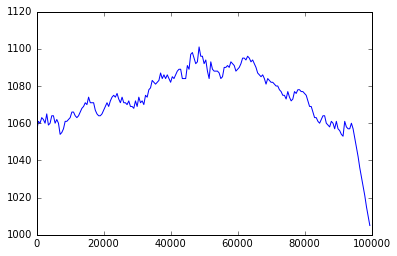

In [241]:
plt.plot(time, mean)